In this notebook we will learn a binary subset of the MNIST handwritten digit dataset. We will learn whether a digit is a zero or a one.

#  Setting up the Data

Adapted from https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py


Note: use Shift+Enter to run the codeblocks

In [1]:
import keras
import numpy as np
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import SGD, Adam
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib figure size and make inline
matplotlib.rcParams['figure.figsize'] = [10, 6]
%matplotlib inline

Using TensorFlow backend.


### Split our data into a training & testing set

`x_train` & `x_test` are the examples, and `y_train` & `y_test` are the labels.

In [9]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

# normalize the pixel values to be in the range (0, 1)
x_train /= 255 
x_test  /= 255


print("Number of training samples in full dataset: " + str(x_train.shape[0]))
print("Number of testing samples in full dataset: " + str(x_test.shape[0]))

# Create a binary version for binary classification
df = pd.DataFrame(np.vstack([x_train, x_test]))
df['label'] = pd.Series(np.concatenate([y_train, y_test]))

labels_to_separate = [0,1]

binary_data = df[df['label'].isin(labels_to_separate)]

# Create the binary dataset
binary_x_train = binary_data.iloc[:10000].drop(['label'], axis=1).as_matrix()
binary_y_train = binary_data.iloc[:10000]['label'].as_matrix()

binary_x_validation = binary_data.iloc[10000:11000].drop(['label'], axis=1).as_matrix()
binary_y_validation = binary_data.iloc[10000:11000]['label'].as_matrix()

binary_x_test  = binary_data.iloc[11000:].drop(['label'], axis=1).as_matrix()
binary_y_test  = binary_data.iloc[11000:]['label'].as_matrix()

print()
print("Total number of binary examples with labels", str(labels_to_separate),": ", binary_data.shape)
print("Number of training samples in BINARY dataset: " + str(binary_x_train.shape[0]))
print("Number of testing samples in BINARY dataset: " + str(binary_x_test.shape[0]))
print("Number of validation samples in BINARY dataset: " + str(binary_x_validation.shape[0]))

Number of training samples in full dataset: 60000
Number of testing samples in full dataset: 10000

Total number of binary examples with labels [0, 1] :  (14780, 785)
Number of training samples in BINARY dataset: 10000
Number of testing samples in BINARY dataset: 3780
Number of validation samples in BINARY dataset: 1000


### Check out what our data looks like

Let's plot one of the training examples

The shape of each image is(784,)


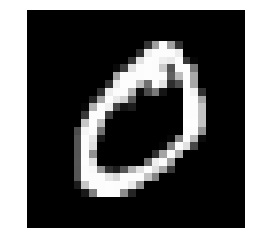

In [10]:
image = binary_x_train[0]
img_rows, img_cols, channels = 28, 28, 1
image = np.reshape(image, [img_rows, img_cols])
plt.imshow(image, cmap='gray')
plt.axis('off')

# The shape of each image is a vector with 784 binary values ("pixels")
image_shape = binary_x_train[0].shape
print("The shape of each image is" + str(image_shape))

# Binary classification

### Let's make our model!!

We're going to train a model that Keras calls a "Sequential" model.

Sequential is an abstraction for really simple networks. There are many ways you can "link" the neurons between layers in a neural network, and "Sequential" is the simplest way to link these layers. Since we're training a single layer network, this doesn't really concern us.

Sidenote: The alternative to in Keras to Sequential models are "Functional" models. You can use those to make fancier networks.

In [11]:
binary_model = Sequential()
num_classes = 1
binary_model.add(Dense(num_classes, activation='sigmoid', input_shape=image_shape))


### Compiling the model

Now that we've told the Keras *what the model is*, we now need to tell it *how to learn*.

1. What's the loss function?

  In class we've seen some loss functions like the hinge loss and the SVM loss. Here we're going to use a different loss function called the "binary crossentropy" loss. Cross-entropy is a loss function that works well for learning because it makes learning very fast when your function is "very wrong" but slower when it is pretty close to the true function. It is another name for the logistic loss that we briefly encountered in the previous lecture and will see a lot more of in coming lectures.

2. What's the optimizer?

  We'll use SGD (Stochastic Gradient Descent) which we've already discussed in class.

3. Which metric to optimize?

  We'll use accuracy- which is what we've been using for our algorithms all semester. There are some other options that make sense for other types of datasets. 

In [12]:
binary_model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])

### Fitting the model

In [13]:
global_batch_size = 128
num_epochs = 10

history = binary_model.fit(binary_x_train, binary_y_train,
                   batch_size=global_batch_size, # average 128 examples in each SGD test
                   epochs=num_epochs,
                   verbose=1,
                   validation_data=(binary_x_validation, binary_y_validation)) 

Train on 10000 samples, validate on 1000 samples
Epoch 1/10
10000/10000 [==============================] - 0s 29us/step - loss: 0.3047 - acc: 0.9449 - val_loss: 0.1488 - val_acc: 0.9960
Epoch 2/10
10000/10000 [==============================] - 0s 14us/step - loss: 0.1113 - acc: 0.9959 - val_loss: 0.0857 - val_acc: 0.9970
Epoch 3/10
10000/10000 [==============================] - 0s 23us/step - loss: 0.0733 - acc: 0.9963 - val_loss: 0.0623 - val_acc: 0.9970
Epoch 4/10
10000/10000 [==============================] - 0s 21us/step - loss: 0.0564 - acc: 0.9966 - val_loss: 0.0498 - val_acc: 0.9970
Epoch 5/10
10000/10000 [==============================] - 0s 17us/step - loss: 0.0467 - acc: 0.9970 - val_loss: 0.0421 - val_acc: 0.9970
Epoch 6/10
10000/10000 [==============================] - 0s 14us/step - loss: 0.0403 - acc: 0.9970 - val_loss: 0.0368 - val_acc: 0.9970
Epoch 7/10
10000/10000 [==============================] - 0s 14us/step - loss: 0.0358 - acc: 0.9970 - val_loss: 0.0330 - val_acc:

### Check out that accuracies!

99% accuracy!

Let's try it on our *test set* instead of our *validation set* now

In [14]:
score = binary_model.evaluate(binary_x_test, binary_y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0221357902147
Test accuracy: 0.998148148148
